In [2]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from MuC import MuC
from MuC import const
from MuC import collider_tools as col
from MuC import detector_tools as det
from MuC import plot_tools as pt

In [3]:
NEVENTS = 5e6

sim_design = MuC.BINSimulator(design=col.muc_10tev, N_evals = NEVENTS, save_mem=False, lattice='beam-optics/ring_v06_smoothed.pkl', remove_ring_fraction=0.93, det_geom='det_v2')
sim_muc10 = sim_design.run()

# sim_design = MuC.BINSimulator(design=col.muc_3tev, N_evals = NEVENTS, save_mem=False, lattice='beam-optics/ring_3tev_v1.2_smoothed.pkl', remove_ring_fraction=0.93, det_geom='det_v2')
# sim_muc3 = sim_design.run()

# sim_design = MuC.BINSimulator(design=col.mut_2tev_pos_pol, N_evals = NEVENTS, save_mem=False, lattice='beam-optics/ring_3tev_v1.2_smoothed.pkl', remove_ring_fraction=0.93, det_geom='det_v2')
# sim_mut = sim_design.run()

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numba/core/dispatcher.py:244: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'AttributeError(module 'numpy' has no attribute 'AxisError')'.
  entrypoints.init_all()
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numba/core/dispatcher.py:244: UserWarning: Numba extension module 'vector' failed to load due to 'AttributeError(module 'numpy' has no attribute 'AxisError')'.
  entrypoints.init_all()


Efficiency of detector acceptance: 3.13e-01
Efficiency of detector acceptance: 3.14e-01
Efficiency of detector acceptance: 3.13e-01
Efficiency of detector acceptance: 3.14e-01
Total count: 1.84e+11 events;



## Print flux files to file

Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_muon_detector_nue.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_muon_detector_numubar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_muon_detector_nuebar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_muon_detector_numu.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_solenoid_mid_nue.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_solenoid_mid_numubar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_solenoid_mid_nuebar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_solenoid_mid_numu.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_hcal_nue.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_hcal_numubar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_hcal_nuebar.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_hcal_numu.dat
Flux file saved to fluxes/MH_Dec11/MH_fluxes_muc_10tev_ecal_nue.dat
Flux file saved to fluxe

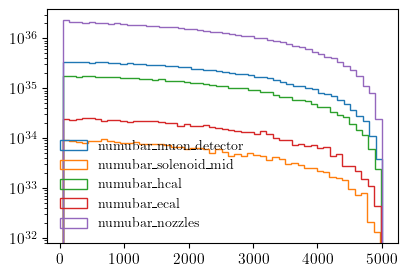

In [7]:
for sim in [sim_muc10]:# sim_muc3, sim_mut]:
    fig, ax = pt.std_fig()
    for sec in sim.comps:
        if sec == 'solenoid_borders':
            continue
        for nu in sim.nuflavors:
            sim.print_GENIE_flux_to_file(sec=sec, nuflavor=nu, filename=f'fluxes/MH_Dec11/MH_fluxes_{sim.design["short_name"]}_{sec}_{nu}.dat')
            if nu=='numubar':
                sim.plot_GENIE_flux(sec=sec, nuflavor=nu, ax=ax)
    ax.set_yscale('log')
    ax.legend()

## Testing loading of GENIE files

In [49]:
data = sim_mut.load_GENIE_events('luc_analysis/Q2_muTs.txt', n_events=1e5)

Loading generated data for a muTs experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [ ]:
_=plt.hist(test.genie_events['nu_E'][test.genie_nuebar], bins =100, histtype='step', label='nuebar')
_=plt.hist(test.genie_events['nu_E'][test.genie_numu], bins =100, histtype='step', label='numu')
_=plt.hist(test.genie_events['nu_E'][test.genie_nue], bins =100, histtype='step', label='nue')
_=plt.hist(test.genie_events['nu_E'][test.genie_numubar], bins =100, histtype='step', label='numubar')
plt.legend()

bins = np.linspace(0,2, 50)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()
def plot_curve(i):
    ax.hist(col_sims[i].mustorage_sims[1].pnu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].mustorage_sims[1].weights, bins = bins, histtype = 'step', label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], zorder = 2, lw=LW, density=True)
    ax.hist(col_sims[i].mustorage_sims[0].pnu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].mustorage_sims[0].weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), zorder = 2, lw=LW, density=True)

# plot_curve(0)
plot_curve(1)
plot_curve(2)
# plot_curve(3)
# plot_curve(4)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

,DComp,nu_E,IncL,OutL,E,px,py,pz,w,Q2
0,MD,254.972,12,11,112.73200,2.175520,1.485250,112.70100,143446.625480,8.819841
1,MD,179.811,12,11,89.50370,0.495869,2.140970,89.47670,143446.625480,4.877323
2,MD,411.423,12,11,29.14280,1.657190,1.336220,29.06500,143446.625480,59.488852
3,MD,292.081,12,11,262.52100,2.150920,-3.021900,262.49500,143446.625480,1.537796
4,MD,292.930,12,11,152.79600,4.990440,-2.699880,152.69000,143446.625480,29.719644
...,...,...,...,...,...,...,...,...,...,...
999997,NO,281.303,-14,-13,125.98900,-1.198160,-2.051430,125.96600,218889.232407,7.144973
999998,NO,333.345,-14,-13,5.68243,1.454340,0.625523,5.45641,218889.232407,148.167673
999999,NO,171.516,-14,-14,161.51200,-0.084083,-1.439870,161.50500,218889.232407,0.140105
1000000,NO,118.214,-14,-14,116.21800,-0.512260,-0.220960,116.21700,218889.232407,0.003993


In [ ]:
# """
#  These are weights to be added to each event from GENIE based on the particle that generated it and the detector in which it interacted.
#  Necessary since I've generated the same amount of detector interactions in each region but they don't all have the same weight.
#  These weights are the percentages of the total count these components have based on large simulations.
#  """
# wmuTs = {
#     "Name": "$\mu$TRISTAN (s)",
#     "tc": 81264561993.55392,
#     "nue": {
#         "MD": 52.75018261623187,
#         "HC": 6.162871642559987,
#         "EC": 1.988838862319425e-11,
#         "NO": 0.13154598641111712,
#         "SB": 1.5768783011372043,
#         "SM": 2.3327090578034047,
#     },
#     "numubar": {
#         "MD": 31.039404930560103,
#         "HC": 3.6271774232568497,
#         "EC": 1.2504908404874962e-10,
#         "NO": 0.07932357166242918,
#         "SB": 0.9276169228908447,
#         "SM": 1.3722895473412542,
#     },
# }
# wmokhov = {
#     "Name": "Mohkov et al. (Fermilab)",
#     "tc": 182892577621.767,
#     "nue": {
#         "MD": 18.195884822599115,
#         "HC": 8.982495802241184,
#         "EC": 1.6316400235210167,
#         "NO": 1.6488589759173493,
#         "SB": 0.40628892516998,
#         "SM": 0.6001777168878794,
#     },
#     "numubar": {
#         "MD": 10.749190518034164,
#         "HC": 5.303804243492552,
#         "EC": 0.9643313285445148,
#         "NO": 0.964947855314657,
#         "SB": 0.23980913837832243,
#         "SM": 0.35487008916862106,
#     },
#     "nuebar": {
#         "MD": 10.726530916266308,
#         "HC": 5.305839760935416,
#         "EC": 0.9675137797536498,
#         "NO": 0.9759483241323901,
#         "SB": 0.23896391998864214,
#         "SM": 0.35298668761568947,
#     },
#     "numu": {
#         "MD": 18.147809466147024,
#         "HC": 8.971637043832846,
#         "EC": 1.6375645457244183,
#         "NO": 1.630277823615734,
#         "SB": 0.4043998924531374,
#         "SM": 0.5982284002653862,
#     },
# }
# wmucols2 = {
#     "Name": "IMCC-II",
#     "tc": 165593902855.0419,
#     "nue": {
#         "MD": 14.828737220689618,
#         "HC": 7.268344410579092,
#         "EC": 0.9021635445152285,  # NOTE: I changed duplicate HC to EC instead
#         "NO": 7.234258229400494,
#         "SB": 0.3388182233432486,
#         "SM": 0.504226158453185,
#     },
#     "nuebar": {
#         "MD": 9.039835317040788,
#         "HC": 4.411161954111631,
#         "EC": 0.551511030202595,
#         "NO": 4.4208021588850475,
#         "SB": 0.2072642492917675,
#         "SM": 0.30793775563130443,
#     },
#     "numu": {
#         "MD": 14.836400495678491,
#         "HC": 7.241186746593437,
#         "EC": 0.9108501350191356,
#         "NO": 7.265860179261139,
#         "SB": 0.34134355096691377,
#         "SM": 0.507198602315641,
#     },
#     "numubar": {
#         "MD": 9.002308594040738,
#         "HC": 4.4187549930826115,
#         "EC": 0.5465999503934863,
#         "NO": 4.400229459832773,
#         "SB": 0.20636824645559132,
#         "SM": 0.30783879421605,
#     },
# }

# weights = {"muTs": wmuTs, "mokhov": wmokhov, "mucols2": wmucols2}


In [ ]:
# counts_dict_0 = {'muon_detector':0, 'hcal':0, 'ecal':0, 'nozzles':0, 'solenoid_borders':0, 'solenoid_mid':0}
# counts_dict_1 = {'muon_detector':0, 'hcal':0, 'ecal':0, 'nozzles':0, 'solenoid_borders':0, 'solenoid_mid':0}
# counts_dict_2 = {'muon_detector':0, 'hcal':0, 'ecal':0, 'nozzles':0, 'solenoid_borders':0, 'solenoid_mid':0}
# counts_dict_3 = {'muon_detector':0, 'hcal':0, 'ecal':0, 'nozzles':0, 'solenoid_borders':0, 'solenoid_mid':0}
# counts_dict = [counts_dict_0, counts_dict_1, counts_dict_2, counts_dict_3]
# tc = 0
# exp = 'mucol s2' #'mutristan s', 'mokhov'
# ne  = 1e5
# reps = 400

# for i in range(reps):
#     sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e5)
#     sd2 = sim.run()
#     tc += sd2.tc/reps
#     for key in counts_dict_1.keys():
#         t = 0
#         for i in range(len(sd2.sims)):
#             counts_dict[i][key]+=sd2.sims[i].facecounts[key]/reps/sd2.tc*100
# print('done')
# print(counts_dict)
# print(tc)

done
[{'muon_detector': 14.828737220689618, 'hcal': 7.268344410579092, 'ecal': 0.9021635445152285, 'nozzles': 7.234258229400494, 'solenoid_borders': 0.3388182233432486, 'solenoid_mid': 0.504226158453185}, {'muon_detector': 9.002308594040738, 'hcal': 4.4187549930826115, 'ecal': 0.5465999503934863, 'nozzles': 4.400229459832773, 'solenoid_borders': 0.20636824645559132, 'solenoid_mid': 0.30783879421605}, {'muon_detector': 9.039835317040788, 'hcal': 4.411161954111631, 'ecal': 0.551511030202595, 'nozzles': 4.4208021588850475, 'solenoid_borders': 0.2072642492917675, 'solenoid_mid': 0.30793775563130443}, {'muon_detector': 14.836400495678491, 'hcal': 7.241186746593437, 'ecal': 0.9108501350191356, 'nozzles': 7.265860179261139, 'solenoid_borders': 0.34134355096691377, 'solenoid_mid': 0.507198602315641}]
165593902855.0419
